# Estadística Bayesiana. 
## Ejemplo de ajuste sucesivo
###### https://www.chreinvent.com/recursos/conceptos-bayesianos
###### https://www.chreinvent.com/recursos/estad%C3%ADstica-bayesiana


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parámetros iniciales de la distribución Beta (a priori)
alpha_prior, beta_prior = 2, 2

Estos valores, `alpha_prior` y `beta_prior`, definen la forma de nuestra creencia inicial sobre (theta). 
+ Una distribución Beta con ɑ = 2  y  ß= 2  centra su masa alrededor de 0.5, indicando que creemos que la probabilidad de éxito está en torno al 50%, 
    + pero esta creencia no es muy fuerte (porque podríamos ajustar estos parámetros a medida que observamos datos).

In [2]:

# Generamos datos de ejemplo (observaciones)
n_observaciones = 20
datos = np.random.binomial(1, 0.6, size=n_observaciones)  # Suponemos que la probabilidad real es 0.6

# Contadores de éxitos y fracasos observados
exitos_observados = np.cumsum(datos)
fracasos_observados = np.cumsum(1 - datos)

Aquí simulamos 20 observaciones de un proceso binomial con una probabilidad real de éxito del 60% (0.6). 
+ Esto significa que, en cada observación, tenemos un 60% de probabilidad de observar un éxito (representado como 1) y un 40% de observar un fracaso (representado como 0).
+ La función `np.random.binomial(1, 0.6, size=n_observaciones)` genera 20 valores binarios (0 o 1) donde 1 representa éxito y 0 representa fracaso.

Usamos `np.cumsum` para calcular el número acumulado de éxitos y fracasos a medida que se observan los datos. 
+ Así, después de cada observación, sabemos cuántos éxitos y fracasos llevamos. Estos valores se usarán para actualizar la distribución posterior.

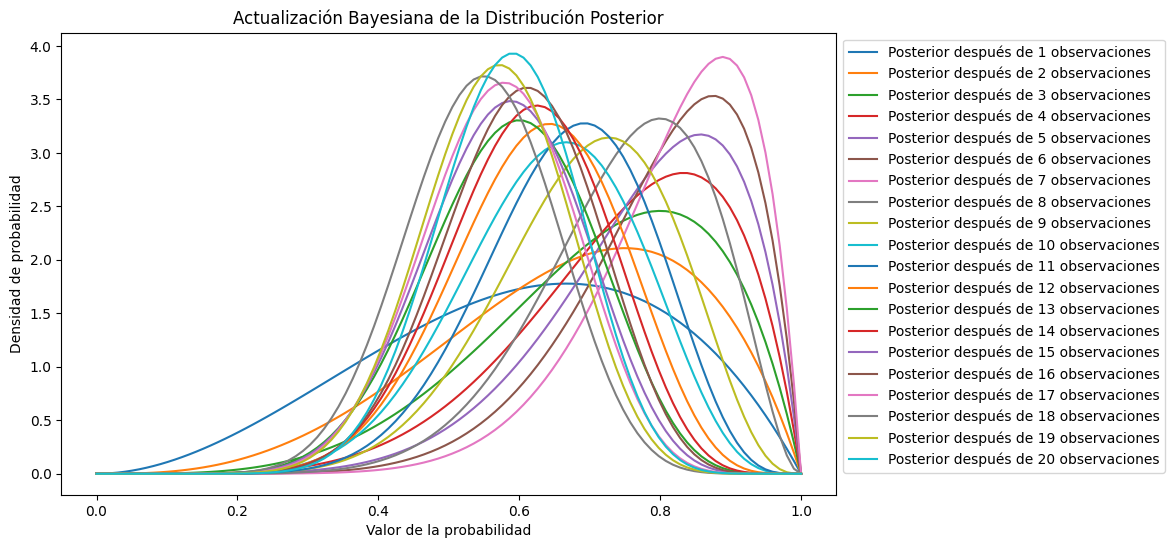

In [3]:

# Configuramos el gráfico
x = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))

# Iteramos para visualizar la actualización posterior
for i, (exitos, fracasos) in enumerate(zip(exitos_observados, fracasos_observados), 1):
    # Parámetros de la posterior en el paso i
    alpha_posterior = alpha_prior + exitos
    beta_posterior = beta_prior + fracasos
    
    # Graficamos la distribución posterior
    posterior = beta(alpha_posterior, beta_posterior).pdf(x)
    plt.plot(x, posterior, label=f'Posterior después de {i} observaciones')

# Gráfico final
plt.title('Actualización Bayesiana de la Distribución Posterior')
plt.xlabel('Valor de la probabilidad')
plt.ylabel('Densidad de probabilidad')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


__________________________________________________________________________________________________________________________________________________

#### Codigo modificado para ver mejor el resultado

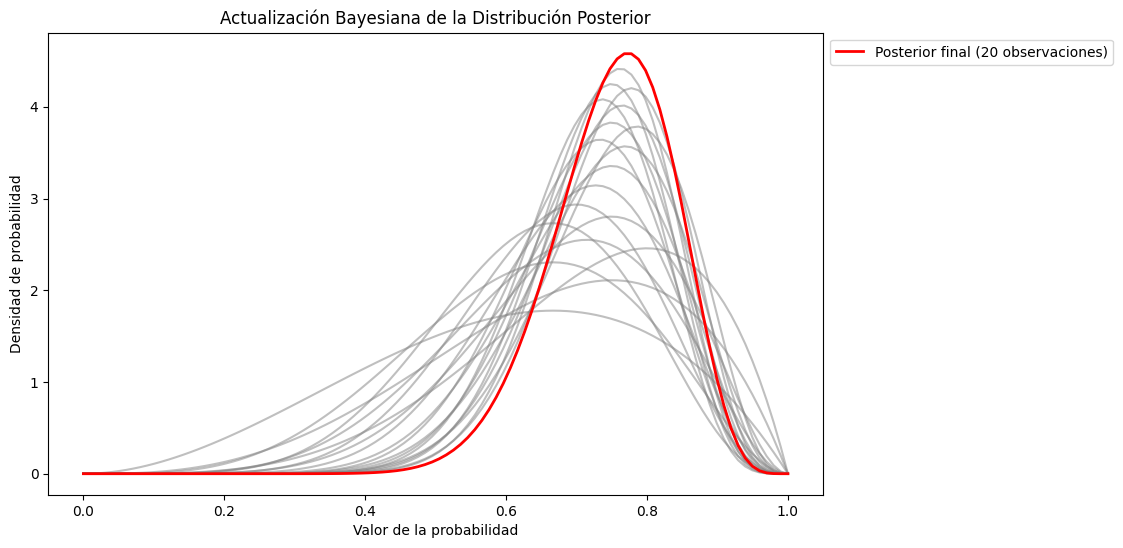

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parámetros iniciales de la distribución Beta (a priori)
alpha_prior, beta_prior = 2, 2

# Generamos datos de ejemplo (observaciones)
n_observaciones = 20
datos = np.random.binomial(1, 0.6, size=n_observaciones)  # Suponemos que la probabilidad real es 0.6

# Contadores de éxitos y fracasos observados
exitos_observados = np.cumsum(datos)
fracasos_observados = np.cumsum(1 - datos)

# Configuramos el gráfico
x = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))

# Iteramos para visualizar la actualización posterior
for i, (exitos, fracasos) in enumerate(zip(exitos_observados, fracasos_observados), 1):
    # Parámetros de la posterior en el paso i
    alpha_posterior = alpha_prior + exitos
    beta_posterior = beta_prior + fracasos
    
    # Graficamos la distribución posterior
    posterior = beta(alpha_posterior, beta_posterior).pdf(x)
    
    # Elegimos color: escala de grises para todas menos la última en rojo
    if i == n_observaciones:
        plt.plot(x, posterior, color='red', linewidth=2, label=f'Posterior final ({i} observaciones)')
    else:
        plt.plot(x, posterior, color='gray', alpha=0.5)

# Gráfico final
plt.title('Actualización Bayesiana de la Distribución Posterior')
plt.xlabel('Valor de la probabilidad')
plt.ylabel('Densidad de probabilidad')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


__________________________________________________